## Experiment on image classification

### Basic Image classification example

At the first step we need to import the necessary libraries and packages, and also configure a path to dataset.
The example uses a dataset that can be downloaded [here](https://www.kaggle.com/datasets/apollo2506/landuse-scene-classification).

In [1]:
import os

from torchvision.transforms import ToTensor, Resize, Compose

from fedot_ind.api.main import FedotIndustrial

DATASETS_PATH = '/media/n31v/data/datasets/Land-Use_Scene_Classification/images'

In this example we will use the dataset with images of land use scenes. The dataset contains 21 classes.

In [2]:
os.listdir(DATASETS_PATH)

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'folds.npy',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

As it was described in other examples, we need to instantiate the class FedotIndustrial with appropriate task type. Also, as the important parameter either the number of classes or torch model should be passed.

In [3]:
fed = FedotIndustrial(task='image_classification', num_classes=21)

2023-06-09 15:34:09,115 INFO: FedotIndustrialAPI - Initialising experiment setup
2023-06-09 15:34:09,116 INFO: FedotIndustrialAPI - Initialising solver
2023-06-09 15:34:09,944 INFO: CVExperimenter - ClassificationExperimenter initialised


The next step is model training with conventional method fit. Here we pass dataset_path, transform option and desirable number of epochs:

In [4]:
trained_model = fed.fit(dataset_path=DATASETS_PATH,
                        transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]),
                        num_epochs=20)

2023-06-09 15:34:09,947 INFO: CVExperimenter - Dataset preparing
100%|██████████| 10500/10500 [00:15<00:00, 691.23it/s]
2023-06-09 15:34:25,157 INFO: ClassificationExperimenter - train: ResNet, using device: cuda
100%|██████████| 263/263 [00:02<00:00, 116.48it/s]
/home/n31v/workspace/Fedot.Industrial/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023-06-09 15:34:27,529 INFO: ClassificationExperimenter - Best f1 score: 0.009667201301304986
2023-06-09 15:34:27,585 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet/train.sd.pt.
2023-06-09 15:34:27,586 INFO: ClassificationExperimenter - Epoch 1
100%|██████████| 263/263 [00:01<00:00, 179.93it/s]
/home/

To obtain predict one must use the following code:

In [5]:
TEST_IMAGE_FOLDER = '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test'
predict = fed.predict(data_path=TEST_IMAGE_FOLDER,
                      transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict

2023-06-09 15:45:14,388 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:03<00:00, 298.57it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000007.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000028.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000033.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000042.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000052.png': 'agricultural',
 '/media/n31v/data/d

Visualization of predictions

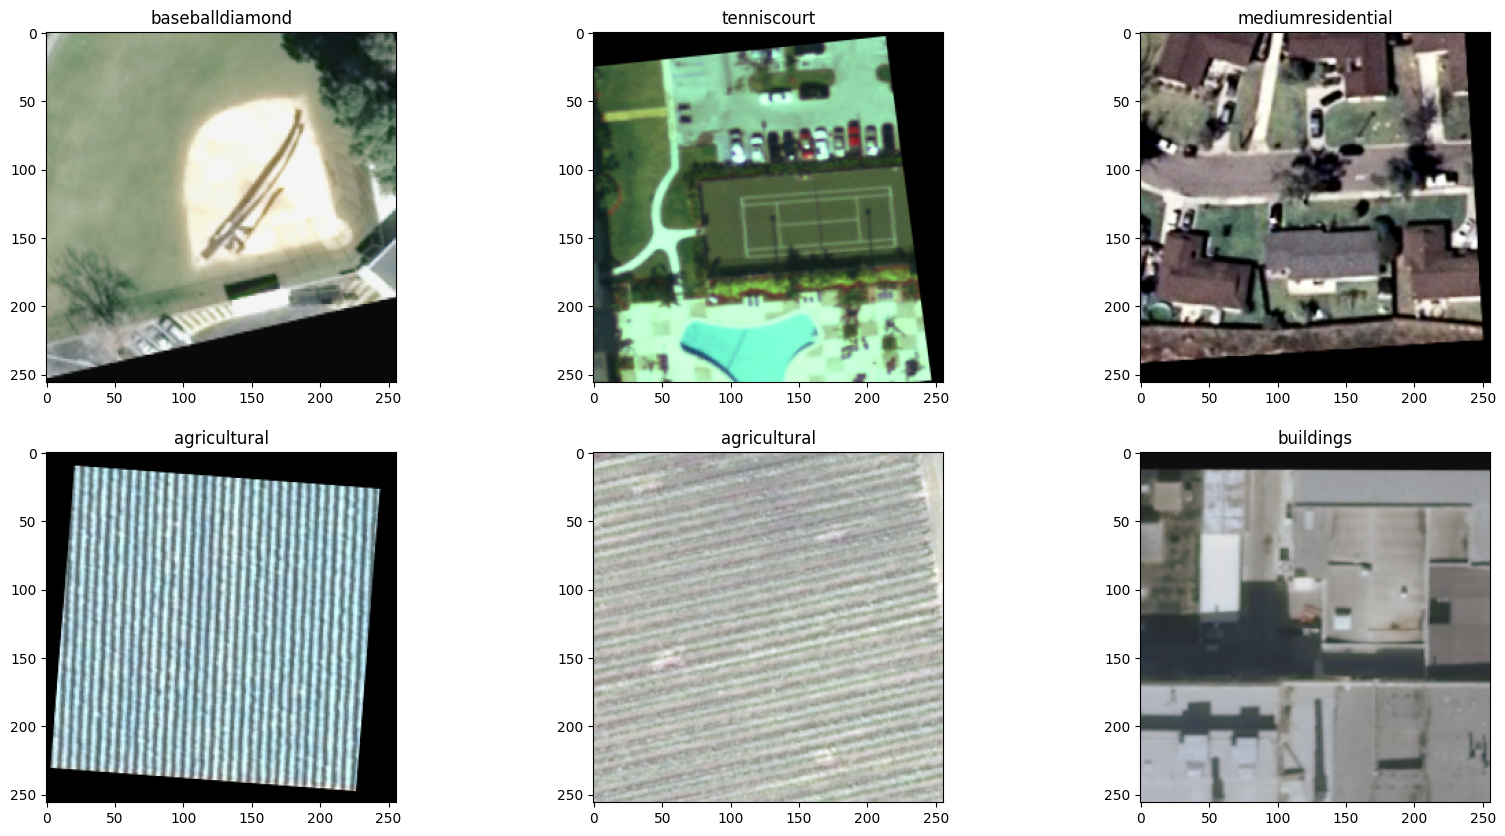

In [6]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(20, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    image_path, prediction = random.choice(list(predict.items()))
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(prediction)
plt.show()

In [7]:
predict_proba = fed.predict_proba(data_path=TEST_IMAGE_FOLDER,
                                  transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict_proba

2023-06-09 15:45:30,383 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:03<00:00, 313.24it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': [0.9974299073219299,
  1.2622214384805375e-08,
  2.4255696189356968e-05,
  6.472029781434685e-05,
  2.0750710177930287e-11,
  8.228143855149028e-08,
  3.21695795002519e-14,
  5.700923288998183e-09,
  0.0012957695871591568,
  1.2394860959830112e-07,
  1.339264528270323e-13,
  4.3284117956510215e-10,
  3.9843835696051766e-12,
  7.760166207543273e-14,
  3.893745542882243e-06,
  6.866728865205507e-13,
  5.624187338071351e-07,
  0.0011703170603141189,
  1.0310601261664942e-08,
  1.0300523172190879e-05,
  6.444236255731539e-10],
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': [0.9982534050941467,
  1.7851685640835058e-07,
  3.5045595723204315e-05,
  1.2267114470887464e-06,
  1.4215520423022099e-06,
  1.6278267139568925e-05,
  1.7176754463221755e-09,
  8.429500667261891e-06,
  1.78123518708162e-0

### Advanced Image classification example

In this example we will use the same dataset as in the previous example, but we will use the advanced features of
FedotIndustrial class. To conduct an advanced experiment one should instantiate FedotIndustrial class with optimization method argument and optimization parameters:

In [8]:
fed = FedotIndustrial(task='image_classification',
                      num_classes=21,
                      optimization='svd',
                      optimization_params={'energy_thresholds': [0.99]}
                      )

2023-06-09 15:45:37,273 INFO: FedotIndustrialAPI - Initialising experiment setup
2023-06-09 15:45:37,273 INFO: FedotIndustrialAPI - Initialising solver
2023-06-09 15:45:37,380 INFO: CVExperimenter - ClassificationExperimenter initialised


Method fit also must be provided with additional argument – finetuning_params:

In [9]:
fitted_model = fed.fit(dataset_path=DATASETS_PATH,
                       transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]),
                       num_epochs=25,
                       finetuning_params={'num_epochs': 5})

2023-06-09 15:45:39,892 INFO: CVExperimenter - Dataset preparing
100%|██████████| 10500/10500 [00:15<00:00, 694.01it/s]
2023-06-09 15:45:55,057 INFO: SVDOptimization - Default size: 44.79 Mb
2023-06-09 15:45:55,818 INFO: SVDOptimization - SVD decomposed size: 50.74 Mb
2023-06-09 15:45:55,819 INFO: ClassificationExperimenter - train: ResNet_SVD_channel_O-10_H-0.1, using device: cuda
100%|██████████| 263/263 [00:01<00:00, 174.82it/s]
/home/n31v/workspace/Fedot.Industrial/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023-06-09 15:45:57,441 INFO: ClassificationExperimenter - Best f1 score: 0.004330972953073909
2023-06-09 15:45:57,481 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_o

To obtain predict one must use the following code:

In [10]:
predict = fed.predict(data_path=TEST_IMAGE_FOLDER,
                      transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict

2023-06-09 16:00:40,787 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:04<00:00, 227.96it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': 'runway',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000007.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000028.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000033.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000042.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000052.png': 'agricultural',
 '/media/n31v/data/dataset

Visualization of predictions

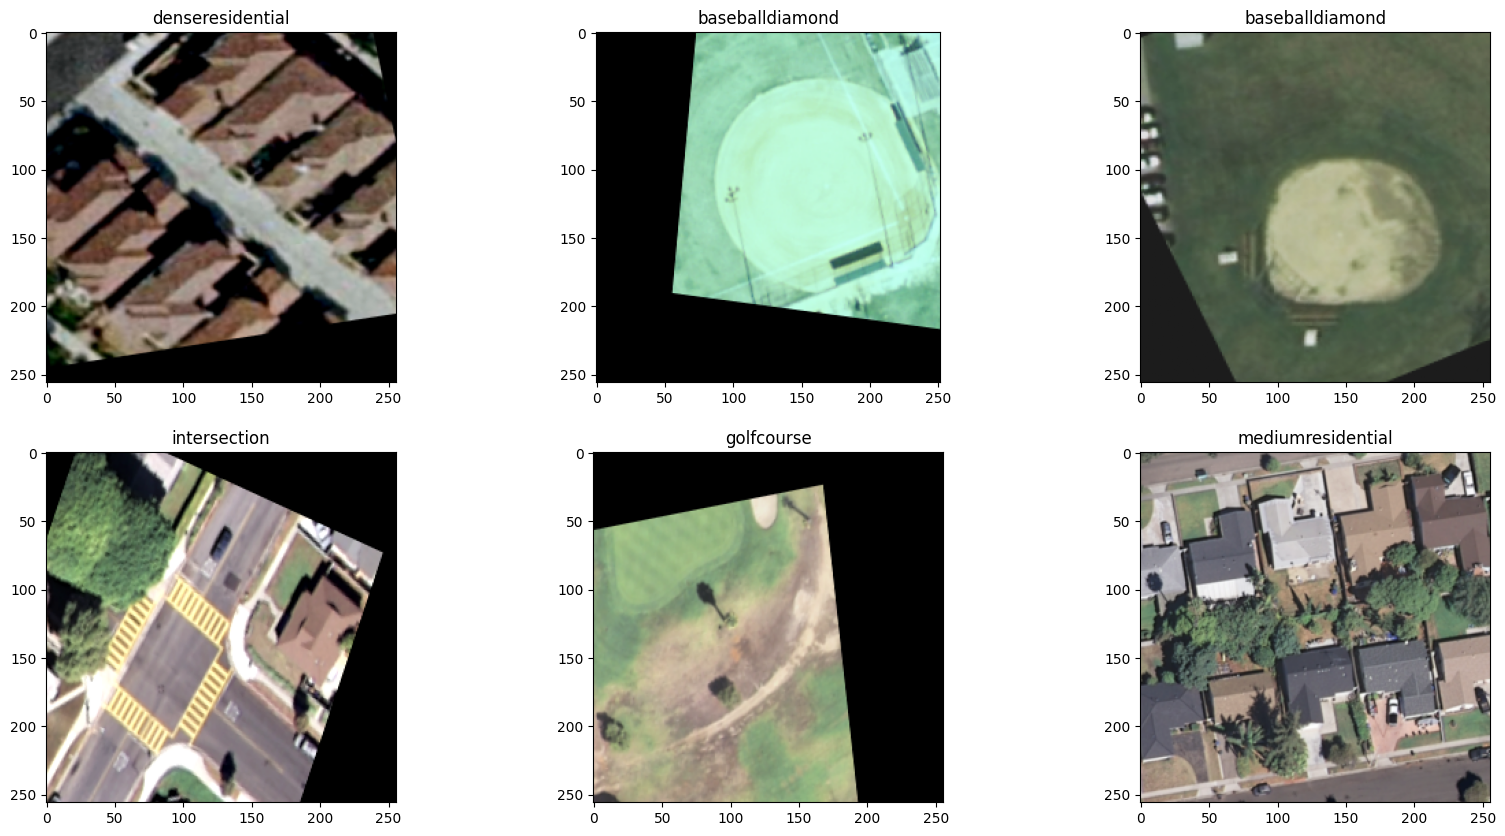

In [11]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(20, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    image_path, prediction = random.choice(list(predict.items()))
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(prediction)
plt.show()

In [12]:
predict_proba = fed.predict_proba(data_path=TEST_IMAGE_FOLDER,
                                  transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict_proba

2023-06-09 16:01:12,534 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:04<00:00, 226.56it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': [0.9511218070983887,
  3.367723433456149e-09,
  5.761183274444193e-06,
  1.4336985714180628e-06,
  4.092685218504144e-11,
  1.7639667504454337e-10,
  3.1686574208673185e-14,
  2.7066068136738508e-11,
  0.04724699631333351,
  9.539913889966556e-07,
  2.6180746806603317e-11,
  3.484405795006751e-07,
  1.3331897434978868e-13,
  3.512371193588673e-14,
  7.721275324001908e-05,
  7.379338330985256e-16,
  2.3222881395668082e-07,
  0.0015430626226589084,
  2.483623862126194e-10,
  2.1754601675638696e-06,
  2.473561444560346e-08],
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': [0.014759673736989498,
  1.8307941829220908e-09,
  6.259939482333721e-07,
  1.8492330999819728e-09,
  1.8709243043701917e-09,
  9.71530690098421e-13,
  1.760933521395558e-12,
  2.4779301874278126e-12,
  0.0005013741902075708